In [1]:
import pandas as pd
import numpy as np

## 注意：builtYear中显示为2020的情况表示:年份建成未知,故意用2020代替

### 若是文本str形式的列,不能存在np.nan或者'' 空值,应该用'无'替换,因为对文本str进行处理不能存在空值NONETYPE

In [81]:
rawdata=pd.read_csv('cqxq.csv')

In [82]:
rawdata[rawdata.duplicated()]

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90


In [83]:
rawdata.describe()

,onSale,onRent,builtYear,builtNum,houseNum,price,follower,dealin90
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,3662.000000,4382.000000,4382.000000
mean,14.862163,4.641944,2012.698083,9.437471,890.812871,12134.919443,74.732086,1.406664
std,26.327302,10.349135,7.510588,16.804965,1253.595769,3955.108169,160.750373,3.047420
min,0.000000,0.000000,1970.000000,1.000000,0.000000,3939.000000,0.000000,0.000000
25%,0.000000,0.000000,2007.000000,2.000000,200.250000,9581.250000,1.000000,0.000000
50%,4.000000,1.000000,2014.000000,4.000000,521.500000,11599.500000,13.000000,0.000000
75%,18.000000,4.000000,2020.000000,11.000000,1152.750000,14136.250000,72.000000,1.000000
max,422.000000,117.000000,2020.000000,521.000000,26407.000000,64872.000000,2989.000000,33.000000


In [84]:
#检查是否type错误!
rawdata.info()
#从下可知:wuyeCost、price类型有误！！

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 16 columns):
XiaoQu       4382 non-null object
Qu           4382 non-null object
buscir       4382 non-null object
tag          4382 non-null object
onSale       4382 non-null int64
onRent       4382 non-null int64
builtYear    4382 non-null int64
builtType    4382 non-null object
wuyeCost     4382 non-null object
servComp     4382 non-null object
builtComp    4382 non-null object
builtNum     4382 non-null int64
houseNum     4382 non-null int64
price        3662 non-null float64
follower     4382 non-null int64
dealin90     4382 non-null int64
dtypes: float64(1), int64(7), object(8)
memory usage: 547.8+ KB


```
tag中缺失值用 无 填充
    builtyear中缺失值用 2020 填充        [当前类型为int,使用时应修改为时间序列]
builttype中缺失值用 无 填充
    wuyecost中缺失值用 无 填充          [应当用np.nan 浮点数填充]
servComp、builtComp中缺失值用 无 填充
    price中缺失值用 无 填充            [应当用np.nan 浮点数填充]
```

### 解决:wuyecost中缺失值用 无 填充  [应当用np.nan 浮点数填充],且应全部转换为float类型

In [85]:
#将每天每平物业费中显示为  a至b 的数据修改为 a与b的平均数
rawdata.loc[rawdata.wuyeCost.str.contains('至'),'wuyeCost']=rawdata.loc[rawdata.wuyeCost.str.contains('至'),'wuyeCost'].map(lambda x:(float((x.split('至'))[0])+float((x.split('至'))[1]))/2)

# 需要先将上面的'至'的替换后,才能进行下面无的替换
# ========================================================

#将每天每平物业费中显示为'无'的数据修改为np.nan浮点数
rawdata.loc[rawdata.wuyeCost=='无','wuyeCost']=np.nan

# ----------------------------------------------------
#将所有的wuyeCost从str类型转换为float
rawdata.wuyeCost=rawdata.wuyeCost.astype('float')

### 解决:price中缺失值用 无 填充    [应当用np.nan 浮点数填充],且应全部转换为float类型

In [86]:
#将price中显示为''的数据修改为np.nan浮点数
rawdata.loc[rawdata.price.isna(),'price']=np.nan

# rawdata.price.isna()
# ----------------------------------------------------

#将所有的wuyeCost从str类型转换为float,不转成int是因为nan无法转换为int
rawdata.price=rawdata.price.astype('float')

In [87]:
rawdata.head(10)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90
0,都和广场,巴南,李家沱,无,10,3,2011,塔板,1.20,重庆都和,重庆都和置业,4,1414,10854.0,25,1
1,东南亚商厦,巴南,李家沱,无,0,0,2020,板楼,NaN,无,无,1,10,NaN,0,0
2,曼哈顿小区,巴南,李家沱,3号线九公里站,55,15,2009,塔楼/板楼,1.20,重庆盈多利,重庆两江房地产,30,3736,10051.0,649,19
3,李家沱正街,巴南,李家沱,无,0,0,2020,塔楼,NaN,无,无,23,4968,6215.0,0,0
4,林荫村,巴南,李家沱,无,0,0,2020,无,NaN,无,无,28,1529,8139.0,0,0
5,城市经典,江北,观音桥,3号线观音桥站,22,11,2009,塔楼,1.00,重庆极鼎,重庆极鼎,5,1816,14285.0,316,2
6,春晖园,江北,观音桥,3号线观音桥站,3,0,2020,塔楼,1.20,无,无,92,4392,10931.0,8,0
7,东方家园,江北,观音桥,3号线华新街站,32,19,2001,塔楼/板楼,35.40,重庆富恒,东宏实业（重庆）,30,2293,11651.0,541,4
8,光宇阳光海岸,江北,观音桥,3号线观音桥站,10,6,2004,塔楼,1.20,重庆渝诚,重庆光宇建设开发,2,601,14124.0,67,2
9,鸥鹏K城,江北,观音桥,3号线华新街站,33,17,2007,塔楼,2.25,重庆新鸥鹏,重庆新欧鹏地产,4,1156,15399.0,261,1


In [88]:
#再次检查类型，wuyeCost、price均已修改完成！
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 16 columns):
XiaoQu       4382 non-null object
Qu           4382 non-null object
buscir       4382 non-null object
tag          4382 non-null object
onSale       4382 non-null int64
onRent       4382 non-null int64
builtYear    4382 non-null int64
builtType    4382 non-null object
wuyeCost     2692 non-null float64
servComp     4382 non-null object
builtComp    4382 non-null object
builtNum     4382 non-null int64
houseNum     4382 non-null int64
price        3662 non-null float64
follower     4382 non-null int64
dealin90     4382 non-null int64
dtypes: float64(2), int64(7), object(7)
memory usage: 547.8+ KB


In [89]:
#整体概览
rawdata.describe()

,onSale,onRent,builtYear,wuyeCost,builtNum,houseNum,price,follower,dealin90
count,4382.000000,4382.000000,4382.000000,2692.000000,4382.000000,4382.000000,3662.000000,4382.000000,4382.000000
mean,14.862163,4.641944,2012.698083,2.308241,9.437471,890.812871,12134.919443,74.732086,1.406664
std,26.327302,10.349135,7.510588,5.395486,16.804965,1253.595769,3955.108169,160.750373,3.047420
min,0.000000,0.000000,1970.000000,0.100000,1.000000,0.000000,3939.000000,0.000000,0.000000
25%,0.000000,0.000000,2007.000000,1.000000,2.000000,200.250000,9581.250000,1.000000,0.000000
50%,4.000000,1.000000,2014.000000,1.500000,4.000000,521.500000,11599.500000,13.000000,0.000000
75%,18.000000,4.000000,2020.000000,2.600000,11.000000,1152.750000,14136.250000,72.000000,1.000000
max,422.000000,117.000000,2020.000000,227.900000,521.000000,26407.000000,64872.000000,2989.000000,33.000000


In [90]:
rawdata.info()
#从下可知：
#仅有wuyeCost、price有缺失值np.nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 16 columns):
XiaoQu       4382 non-null object
Qu           4382 non-null object
buscir       4382 non-null object
tag          4382 non-null object
onSale       4382 non-null int64
onRent       4382 non-null int64
builtYear    4382 non-null int64
builtType    4382 non-null object
wuyeCost     2692 non-null float64
servComp     4382 non-null object
builtComp    4382 non-null object
builtNum     4382 non-null int64
houseNum     4382 non-null int64
price        3662 non-null float64
follower     4382 non-null int64
dealin90     4382 non-null int64
dtypes: float64(2), int64(7), object(7)
memory usage: 547.8+ KB


## 数据修改完毕,to_csv备用,下次处理只需直接载入即可继续处理

In [91]:
rawdata.to_csv('readyCQXQ.csv')

In [145]:
rdata=pd.read_csv('readyCQXQ.csv',index_col=0)
#第一列作为index

In [147]:
# 对于每个小区,用  户数/栋数  可以初略看看 住户密集度,故增加一列  huPerdong
rdata['huPerdong']=rdata.houseNum/rdata.builtNum

In [148]:
rdata.head()

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,huPerdong
0,都和广场,巴南,李家沱,无,10,3,2011,塔板,1.2,重庆都和,重庆都和置业,4,1414,10854.0,25,1,353.500000
1,东南亚商厦,巴南,李家沱,无,0,0,2020,板楼,NaN,无,无,1,10,NaN,0,0,10.000000
2,曼哈顿小区,巴南,李家沱,3号线九公里站,55,15,2009,塔楼/板楼,1.2,重庆盈多利,重庆两江房地产,30,3736,10051.0,649,19,124.533333
3,李家沱正街,巴南,李家沱,无,0,0,2020,塔楼,NaN,无,无,23,4968,6215.0,0,0,216.000000
4,林荫村,巴南,李家沱,无,0,0,2020,无,NaN,无,无,28,1529,8139.0,0,0,54.607143


In [149]:
#发现渝中和九龙坡的大坪重复,故将九龙坡的大坪改名大坪9,以便区分
rdata.loc[(rdata.Qu=='九龙坡') & (rdata.buscir=='大坪'),'buscir']='大坪9'

In [51]:
groupbyQuAndBuscir=rdata.groupby(['Qu','buscir']).size()

In [27]:
#南岸区 小区数量 降序排列
groupbyQuAndBuscir.loc['南岸'].sort_values(ascending=False)

buscir
南坪      258
茶园新区    126
南滨路      74
弹子石      61
四公里      43
融侨半岛     29
南山       24
七公里      24
六公里      22
丹龙路      18
八公里       7
dtype: int64

In [28]:
#渝北区 小区数量 降序排列
groupbyQuAndBuscir.loc['渝北'].sort_values(ascending=False)

buscir
回兴      98
空港新城    83
人和      73
龙头寺     73
两路      58
汽博中心    57
照母山     55
嘉州      45
新牌坊     44
大竹林     33
冉家坝     31
黄泥磅     30
中央公园    30
鸳鸯      26
礼嘉      26
花卉园     23
松树桥     18
花园新村    17
悦来      15
北环      14
财富中心    11
龙溪      11
大石坝      7
南桥寺      6
翠云       6
园博园      4
石子山      3
dtype: int64

In [30]:
#江北区 小区数量 降序排列
groupbyQuAndBuscir.loc['江北'].sort_values(ascending=False)

buscir
观音桥    188
五里店     79
大石坝     46
南桥寺     44
石马河     35
海尔路     35
北滨路     23
鸿恩寺     22
江北嘴     20
龙头寺     13
花卉园     12
鱼嘴       9
石子山      7
黄泥磅      6
冉家坝      5
大竹林      1
dtype: int64

In [52]:
#九龙坡区 小区数量 降序排列
groupbyQuAndBuscir.loc['九龙坡'].sort_values(ascending=False)

buscir
石桥铺    160
杨家坪    119
华岩      61
石坪桥     55
黄桷坪     43
谢家湾     40
二郎      32
蟠龙      24
陈家坪     21
毛线沟     18
马王乡     16
白市驿     15
彩云湖     14
袁家岗     13
动物园     13
西彭       9
巴国城      7
大坪9      6
双山       5
dtype: int64

In [32]:
#沙坪坝区 小区数量 降序排列
groupbyQuAndBuscir.loc['沙坪坝'].sort_values(ascending=False)

buscir
大学城     88
小龙坎     67
凤天路     65
天星桥     58
烈士墓     45
沙正街     45
工人村     42
石桥铺     32
陈家桥     25
三峡广场    23
西永      21
沙滨路     20
杨公桥     18
渝碚路     17
站西路     17
双碑      11
劳动路      7
梨树湾      5
磁器口      4
dtype: int64

In [34]:
#大渡口区 小区数量 降序排列
groupbyQuAndBuscir.loc['大渡口'].sort_values(ascending=False)

buscir
九宫庙      48
步行街      36
双山       27
马王乡      22
大渡口区府    15
建设村      11
巴国城      11
华岩        1
dtype: int64

In [35]:
#巴南区 小区数量 降序排列
groupbyQuAndBuscir.loc['巴南'].sort_values(ascending=False)

buscir
李家沱     118
鱼洞      105
龙洲湾      69
融汇半岛     26
界石        9
南泉        3
八公里       1
dtype: int64

In [36]:
#渝中区 小区数量 降序排列
groupbyQuAndBuscir.loc['渝中'].sort_values(ascending=False)

buscir
解放碑    147
大坪     145
两路口    110
上清寺     28
朝天门     20
化龙桥     14
袁家岗      7
dtype: int64

In [22]:
groupbyQuAndBuscir_descending_top20=groupbyQuAndBuscir.sort_values(ascending=False).head(20)

In [23]:
#按 区和商圈 计数,小区数量最多的前20大商圈
groupbyQuAndBuscir_descending_top20

Qu   buscir
南岸   南坪        258
江北   观音桥       188
九龙坡  石桥铺       160
渝中   解放碑       147
     大坪        145
南岸   茶园新区      126
九龙坡  杨家坪       119
巴南   李家沱       118
渝中   两路口       110
巴南   鱼洞        105
渝北   回兴         98
沙坪坝  大学城        88
渝北   空港新城       83
江北   五里店        79
南岸   南滨路        74
渝北   人和         73
     龙头寺        73
巴南   龙洲湾        69
沙坪坝  小龙坎        67
     凤天路        65
dtype: int64

In [39]:
#在小区数量最多的前20大商圈中,渝北占据4席位居第一
groupbyQuAndBuscir_descending_top20.groupby('Qu').size().sort_values(ascending=False)

Qu
渝北     4
渝中     3
沙坪坝    3
巴南     3
南岸     3
江北     2
九龙坡    2
dtype: int64

## builtYear的统计分析

In [56]:
#初步查看
rdata.builtYear.describe()

count    4382.000000
mean     2012.698083
std         7.510588
min      1970.000000
25%      2007.000000
50%      2014.000000
75%      2020.000000
max      2020.000000
Name: builtYear, dtype: float64

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('lqj')

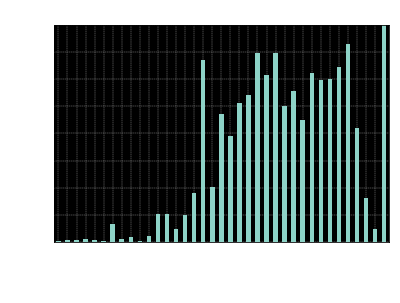

In [153]:
ax=rdata.groupby('builtYear').size().plot(kind='bar',title='重庆小区 按建成年份 作数量加总')

ax.set_xlabel('建成年份')
ax.set_ylabel('数量')
ax.set_ylim(0,200);
#由于2020(建成年份缺失)的数据较多,故故意将ylim设置为200以内,便于看清2019年以内的数据细节

In [115]:
#小区名称  重复的  较少,故没有必要按照小区名字进行分组,而区和商圈显然重复很多,需要分组
rdata[rdata.XiaoQu.duplicated()]

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90
3241,越昕晖,巴南,融汇半岛,无,0,0,2018,塔楼/板楼,2.125,无,无,4,10,7505.0,4,0
4077,庆隆南山高尔夫国际社区,南岸,茶园新区,无,1,0,2013,板楼,2.500,重庆希尔顿,无,2,43,9016.0,2,0
4114,庆隆南山高尔夫国际社区,南岸,茶园新区,无,9,0,2014,板楼,2.000,重庆希尔顿,无,3,147,10766.0,5,0
4308,志高花园,九龙坡,石坪桥,无,0,0,2020,无,NaN,无,无,1,272,NaN,0,0
4320,中渝春华秋实,沙坪坝,大学城,无,2,1,2020,无,NaN,无,无,6,1143,11037.0,0,0
4359,煤建新村,渝中,大坪,无,1,0,2020,无,NaN,无,无,1,20,11956.0,0,0
4374,玛瑙苑,南岸,南坪,无,1,0,2020,无,NaN,无,无,1,0,8272.0,0,0


In [117]:
# 建筑类型共有以下几种:
rdata.builtType.unique()

array(['塔板', '板楼', '塔楼/板楼', '塔楼', '无', '塔楼/板楼/塔板', '塔楼/塔板', '塔楼/塔板/平房',
       '板楼/塔板', '塔楼/平房', '塔楼/板楼/塔板/平房', '板楼/平房', '塔楼/板楼/平房', '板楼/塔板/平房',
       '平房', '塔板/平房'], dtype=object)

In [123]:
aset=set()
for lou in rdata.builtType.unique():
    if '/' in lou:
        aftersplit=lou.split('/')
        for i in aftersplit:
            aset.add(i)
    else:
        aset.add(lou)
aset
# 利用集合 可见共有 '塔板', '塔楼', '平房', '无', '板楼' 这几种

## 此处若需要将建筑类型进行映射,例如:

{'塔板':2, '塔楼':1, '平房':4, '无':0, '板楼':3}
然后替换列中的str为相应的int之和,以便于区分

In [131]:
# 在售的总套数
rdata.onSale.sum()

65126

In [129]:
#在售的最多的小区 前20
rdata.sort_values('onSale',ascending=False).head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90
4259,重庆万达文化旅游城御林,沙坪坝,陈家桥,无,422,20,2016,塔楼/板楼,2.50,重庆融创物业,无,28,6852,10239.0,84,9
2761,和记黄埔御峰,南岸,南坪,环线海棠溪站,285,38,2015,塔楼/板楼,6.50,家利物业管理(重庆),和记黄埔地产（重庆两江新区）,45,4984,14865.0,1234,17
2253,珠江城,巴南,李家沱,无,264,15,2014,塔楼/板楼/塔板/平房,3.25,重庆市珠江实业,重庆市汇景实业,87,6855,10987.0,200,6
1295,阳光100国际新城,南岸,南滨路,环线涂山站,257,89,2007,塔楼,1.20,重庆渝能,重庆渝能壹佰,19,4344,15670.0,1398,5
1454,亚太商谷,南岸,南坪,3号线工贸站,220,49,2008,塔楼/塔板,2.75,重庆融创,重庆融创亚太实业,14,8130,12927.0,627,22
3465,金科廊桥天都,沙坪坝,大学城,无,215,73,2012,塔楼/塔板,2.00,重庆金科,重庆市金科星聚置业,16,4219,10683.0,323,16
3539,恒大山水城,渝北,照母山,无,200,66,2015,塔楼,2.80,恒大地产集团金碧物业,恒大地产重庆,40,6095,15426.0,1033,33
2407,金科廊桥水乡E区,沙坪坝,大学城,无,195,48,2011,塔楼,1.80,重庆金科,重庆金科,17,3423,10743.0,262,13
1425,龙湖春森彼岸,江北,北滨路,无,187,108,2008,塔楼/塔板,2.80,重庆新龙湖,重庆龙湖地产发展,24,3817,20231.0,2989,18
3599,华侨城云溪别院,渝北,礼嘉,无,185,10,2017,塔楼/板楼,3.60,深圳市华侨城物业服务,重庆华侨城实业发展,22,1264,16078.0,69,1


In [132]:
# 在租的总套数
rdata.onRent.sum()

20341

In [133]:
#在租的最多的小区 前20
rdata.sort_values('onRent',ascending=False).head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90
2010,万科金域学府,南岸,七公里,3号线六公里站,166,117,2017,塔楼/板楼/塔板,2.750,成都万科物业服务,万科（重庆）房地产,43,7089,15066.0,619,25
1425,龙湖春森彼岸,江北,北滨路,无,187,108,2008,塔楼/塔板,2.800,重庆新龙湖,重庆龙湖地产发展,24,3817,20231.0,2989,18
99,上品拾陆,渝北,黄泥磅,6号线红土地站,134,108,2007,塔楼/塔板,1.300,重庆市上品,重庆市环保建设,16,4822,14698.0,1395,26
1448,协信城,南岸,南坪,3号线南坪站,166,99,2012,塔楼,3.700,重庆天骄物业管理服务,协信集团,8,3550,15223.0,789,17
1763,龙湖时代天街,渝中,大坪,1号线石油路站,73,97,2011,塔楼/板楼/塔板,11.250,重庆新龙湖,重庆龙湖地产发展,24,6223,20951.0,413,9
2898,中渝山顶道国宾城,渝北,嘉州,3号线郑家院子站,133,95,2012,塔楼/塔板,41.250,重庆加州物业服务,重庆中渝物业发展,13,3165,18723.0,942,8
1767,万科锦程,渝中,大坪,1号线石油路站,111,93,2010,塔楼/板楼/塔板,2.275,万科,万科（重庆）房地产,17,4155,19158.0,1037,19
1295,阳光100国际新城,南岸,南滨路,环线涂山站,257,89,2007,塔楼,1.200,重庆渝能,重庆渝能壹佰,19,4344,15670.0,1398,5
1946,雍江艺庭,渝中,化龙桥,无,82,84,2010,塔楼,2.600,上海丰城,重庆瑞安天地房地产发展,17,1569,19116.0,723,3
3709,中海紫御江山紫峰,江北,江北嘴,6号线五里店站,138,83,2013,塔楼/板楼/塔板,5.450,中海,中海地产集团,9,2262,18823.0,1217,10


In [134]:
#栋数最多的小区 前20-----栋数多,则基本为独栋,豪宅
rdata.sort_values('builtNum',ascending=False).head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90
2495,保利高尔夫花园,渝北,汽博中心,3号线金童路站,15,4,2005,板楼,3.00,保利重庆,保利（重庆）投资实业,521,522,33784.0,126,0
3679,庆隆南山高尔夫国际社区山外山,南岸,茶园新区,无,17,0,2014,板楼,3.00,重庆希尔顿,无,294,358,14760.0,12,1
3592,比华利豪园,渝北,人和,4号线民安大道站,12,1,2004,板楼,4.80,重庆金科物业服务,和记黄埔地产（重庆两江新区）,217,217,23361.0,34,1
1945,锦绣山庄,渝北,新牌坊,4号线民安大道站,8,2,2002,板楼,1.36,重庆华新锦绣山庄物业经营,重庆华新国际城市发展,164,424,13418.0,118,1
2379,华立天地豪园,江北,鸿恩寺,无,11,1,2002,板楼,1.40,重庆华立物业,重庆嘉浩置业,143,530,13603.0,112,1
2405,龙湖香樟林别墅,渝北,新牌坊,环线洪湖东路站,9,8,2001,板楼,4.00,重庆龙湖置业物业管理,重庆龙湖地产发展,140,207,41679.0,158,0
2378,嘉凯城北麓官邸,江北,鸿恩寺,无,11,0,2013,板楼,4.00,上海恒豪基业物业服务,嘉凯城集团股份,132,320,16213.0,171,1
2213,融科橡树澜湾,渝北,鸳鸯,3号线鸳鸯站,30,2,2016,板楼,4.00,第一太平融科,重庆融科智地,131,614,19775.0,121,1
843,首钢美利山,渝北,园博园,3号线园博园站,36,0,2008,塔板,2.50,重庆美利山物业服务,重庆首钢,130,663,13809.0,277,1
3546,万科渝园,渝北,回兴,无,44,4,2020,板楼,3.35,万科物业,无,123,845,15900.0,151,1


In [135]:
# 户数最多的小区 前20
rdata.sort_values('houseNum',ascending=False).head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90
3926,学府悦园,沙坪坝,陈家桥,无,0,0,2020,无,NaN,无,无,67,26407,NaN,2,0
1011,民安华福,九龙坡,华岩,无,0,0,2020,无,NaN,无,无,54,21240,NaN,5,0
3636,重庆华南城,巴南,界石,无,0,0,2015,塔楼/塔板,3.00,第一亚太,重庆华南城,9,19950,11793.0,1,0
236,民心佳园,渝北,汽博中心,3号线童家院子站,0,0,2020,无,NaN,无,无,54,18060,NaN,32,0
3137,文化一村,九龙坡,谢家湾,2号线袁家岗站,1,2,1996,板楼,NaN,无物业管理服务,无开发商,65,16250,9000.0,15,1
3910,美丽阳光家园,沙坪坝,烈士墓,无,0,0,2020,无,NaN,重庆洪圈,无,32,15570,NaN,2,0
3460,重庆融创文旅城,沙坪坝,陈家桥,无,4,0,2020,塔楼/板楼,3.85,重庆融创,重庆万达广场置业,97,10037,10281.0,149,0
2666,合建村,巴南,李家沱,无,0,0,1985,板楼,NaN,无物业管理服务,无开发商,96,9857,10265.0,1,0
3129,健康路(渝中),渝中,两路口,1号线两路口站,1,0,1990,板楼/塔板/平房,NaN,无物业管理服务,无开发商,101,9034,7069.0,1,0
2762,融创春晖十里,大渡口,九宫庙,无,109,2,2016,塔楼,3.50,重庆融创物业,重庆融品汇智,47,8420,10689.0,178,9


In [140]:
#最拥挤的 前20
# 由于有尚未建成的builtYear为2020的,故应将其排除掉后再统计
rdata.loc[rdata.builtYear!=2020,:].sort_values('huPerdong',ascending=False).head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,户每栋
3636,重庆华南城,巴南,界石,无,0,0,2015,塔楼/塔板,3.0,第一亚太,重庆华南城,9,19950,11793.0,1,0,2216.666667
4272,上锦星城,南岸,茶园新区,无,12,1,2014,板楼,1.2,无,无,1,1431,11272.0,8,0,1431.000000
2349,茂业大厦,江北,观音桥,3号线观音桥站,10,9,2006,塔楼,3.0,无,无,1,1368,11012.0,56,1,1368.000000
3485,熊猫公馆,渝中,解放碑,1号线较场口站,13,7,2017,塔楼/板楼,6.6,重庆美丽之冠,重庆帝维美丽之冠投资,1,1347,21439.0,63,1,1347.000000
1470,金洲大厦,九龙坡,石坪桥,2号线袁家岗站,11,2,2006,塔楼,1.1,重庆亿博,重庆翁达物业发展,1,1296,10992.0,30,1,1296.000000
3547,汇祥荟广场,九龙坡,石桥铺,1号线石桥铺站,12,6,2017,板楼,8.1,重庆创模,重庆汉融实业,1,1260,18576.0,11,0,1260.000000
1716,金山商务大厦,渝中,解放碑,1号线七星岗站,4,2,2002,塔楼,1.0,重庆金山物业管理责任,重庆兴绿洲建设,1,1184,11080.0,127,2,1184.000000
3454,朝天门国际商贸城,南岸,茶园新区,无,0,0,2016,塔板,6.8,重庆锦宏,重庆朝天门国际商贸城股份,3,3361,12330.0,0,0,1120.333333
2770,华宇天宫花城,渝北,龙头寺,4号线重庆北站北广场站,0,0,2018,板楼,227.9,重庆华宇物业服务,重庆华宇集团,1,1101,15645.0,118,1,1101.000000
1988,星宇花园,南岸,南坪,3号线南坪站,24,8,2002,塔楼,1.0,重庆兴胜物业发展物业管理,重庆兴胜物业发展,4,4320,10908.0,100,1,1080.000000


In [139]:
# 最宽松的 前20--------以此区分豪宅较容易
# 由于有尚未建成的builtYear为2020的,故应将其排除掉后再统计
rdata.loc[rdata.builtYear!=2020,:].sort_values('huPerdong').head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,户每栋
3495,棕榈泉山顶别墅,渝北,人和,无,0,0,2016,板楼,8.0,重庆棕榈泉联英物业服务,重庆棕榈泉,14,14,NaN,8,0,1.000000
3298,南温泉度假小镇,巴南,南泉,无,0,0,2016,板楼,2.0,重庆豪生,重庆绿谷开发建设,2,2,NaN,0,0,1.000000
2855,财信赖特与山,江北,海尔路,无,0,0,2015,塔楼/板楼,6.0,重庆财信,重庆财信,15,15,NaN,10,0,1.000000
2850,同景国际城郡望,南岸,茶园新区,无,1,0,2013,无,4.0,重庆同景,重庆同景置业,9,9,13982.0,6,0,1.000000
3592,比华利豪园,渝北,人和,4号线民安大道站,12,1,2004,板楼,4.8,重庆金科物业服务,和记黄埔地产（重庆两江新区）,217,217,23361.0,34,1,1.000000
4062,保利小泉别墅,巴南,南泉,无,2,0,2011,无,3.5,无,无,6,6,20147.0,5,1,1.000000
3529,龙湖江与城天矩,渝北,大竹林,无,3,0,2010,板楼,6.7,无,无,94,94,29275.0,35,0,1.000000
4217,金桂花园,江北,海尔路,无,0,0,2005,板楼,NaN,无,无,1,1,8538.0,2,0,1.000000
3661,庆隆南山高尔夫国际社区柏翠庄,南岸,茶园新区,无,20,0,2011,板楼,4.0,重庆希尔顿,庆隆屋业/众诚物业,39,39,16948.0,6,1,1.000000
2495,保利高尔夫花园,渝北,汽博中心,3号线金童路站,15,4,2005,板楼,3.0,保利重庆,保利（重庆）投资实业,521,522,33784.0,126,0,1.001919


In [142]:
#价格最贵的 前20-----豪宅
rdata.sort_values('price',ascending=False).head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,户每栋
3581,华宇北城商务街,渝北,龙头寺,3号线狮子坪站,0,0,2020,塔楼/塔板,NaN,无,无,2,1010,64872.0,0,0,505.000000
3625,帝景名苑B区,南岸,南坪,3号线铜元局站,1,0,2020,无,NaN,无,无,4,4,60337.0,6,0,1.000000
3706,龙湖蓝湖郡西岸,渝北,鸳鸯,无,1,0,2020,板楼,3.0,无,无,8,12,52543.0,24,0,1.500000
2032,寰宇天下东升府,江北,江北嘴,6号线大剧院站,2,1,2017,塔楼,4.2,重庆中海地产物业,中海地产集团,7,38,49170.0,452,0,5.428571
2405,龙湖香樟林别墅,渝北,新牌坊,环线洪湖东路站,9,8,2001,板楼,4.0,重庆龙湖置业物业管理,重庆龙湖地产发展,140,207,41679.0,158,0,1.478571
1883,东原1891印长江,南岸,南滨路,无,1,2,2016,塔楼,10.5,重庆新东原,重庆东原地产开发,4,219,38920.0,157,0,54.750000
3496,万汇ONE58,江北,观音桥,6号线红土地站,0,2,2018,板楼,10.0,重庆万汇物业服务,重庆万汇置业,1,542,36575.0,6,0,542.000000
2389,融创勋爵堡,渝北,汽博中心,3号线童家院子站,10,0,2012,板楼,3.5,重庆融创,重庆融创基业,50,116,35305.0,57,0,2.320000
2495,保利高尔夫花园,渝北,汽博中心,3号线金童路站,15,4,2005,板楼,3.0,保利重庆,保利（重庆）投资实业,521,522,33784.0,126,0,1.001919
2148,美全世纪城,南岸,丹龙路,环线海峡路站,0,0,2015,板楼/塔板,5.0,重庆美全,重庆美全置业,7,1201,33668.0,1,0,171.571429


In [154]:
# 被关注最多的  前20
rdata.sort_values('follower',ascending=False).head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,huPerdong
1425,龙湖春森彼岸,江北,北滨路,无,187,108,2008,塔楼/塔板,2.800,重庆新龙湖,重庆龙湖地产发展,24,3817,20231.0,2989,18,159.041667
2578,华润中央公园,江北,大石坝,无,143,51,2010,塔楼/板楼/塔板,2.150,重庆华润二十四城物业服务,重庆天拓置业发展,27,5307,16370.0,1880,20,196.555556
11,招商江湾城,江北,北滨路,3号线华新街站,76,64,2009,塔楼/板楼/塔板,3.600,招商局,招商局地产（重庆）,16,2894,17343.0,1769,10,180.875000
1856,龙湖源著北区,江北,石子山,环线体育公园站,145,53,2011,塔楼/板楼,3.200,龙湖物业服务集团,重庆嘉逊地产开发,40,5310,17948.0,1626,28,132.750000
1295,阳光100国际新城,南岸,南滨路,环线涂山站,257,89,2007,塔楼,1.200,重庆渝能,重庆渝能壹佰,19,4344,15670.0,1398,5,228.631579
99,上品拾陆,渝北,黄泥磅,6号线红土地站,134,108,2007,塔楼/塔板,1.300,重庆市上品,重庆市环保建设,16,4822,14698.0,1395,26,301.375000
2051,万科城,渝北,照母山,5号线重光站,75,45,2014,塔楼,2.200,成都万科物业服务,万科（重庆）蓝山置业,9,2548,14708.0,1305,20,283.111111
3275,国兴北岸江山东区,江北,北滨路,无,99,20,2013,塔楼,2.500,北京国兴三吉利物业管理,重庆国兴置业,13,4148,16342.0,1290,18,319.076923
1409,约克郡,渝北,照母山,5号线重光站,49,13,2014,塔楼/板楼/塔板,3.950,第一太平戴维斯物业顾问(北京),重庆怡置,31,1877,17400.0,1260,8,60.548387
353,珠江太阳城A区,江北,北滨路,6号线大剧院站,143,78,2009,塔楼,3.200,重庆珠江,重庆珠江实业,17,2745,17425.0,1258,11,161.470588


In [144]:
# 90天内 成交最多的  前20
rdata.sort_values('dealin90',ascending=False).head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,户每栋
4173,保利观澜悦城,江北,海尔路,环线渝鲁站,67,28,2018,塔楼,2.60,重庆保利,无,9,2225,17131.0,182,33,247.222222
3539,恒大山水城,渝北,照母山,无,200,66,2015,塔楼,2.80,恒大地产集团金碧物业,恒大地产重庆,40,6095,15426.0,1033,33,152.375000
3284,康桥融府,渝北,照母山,5号线湖霞街站,122,60,2017,塔楼/板楼/平房,4.50,重庆康田物业服务,重庆康田雍俊,45,4315,16747.0,611,32,95.888889
3742,旭辉城橙郡,巴南,龙洲湾,3号线大山村站,136,26,2015,塔楼,2.20,上海永生物业,旭辉集团股份,12,3310,12315.0,228,30,275.833333
1856,龙湖源著北区,江北,石子山,环线体育公园站,145,53,2011,塔楼/板楼,3.20,龙湖物业服务集团,重庆嘉逊地产开发,40,5310,17948.0,1626,28,132.750000
443,保利香雪,江北,南桥寺,环线玉带山站,83,41,2010,塔楼/塔板,40.90,重庆保利,重庆保利地产发展,29,6045,15742.0,639,28,208.448276
99,上品拾陆,渝北,黄泥磅,6号线红土地站,134,108,2007,塔楼/塔板,1.30,重庆市上品,重庆市环保建设,16,4822,14698.0,1395,26,301.375000
1265,同景国际城W组团,南岸,茶园新区,6号线邱家湾站,147,7,2012,塔楼,1.70,重庆同景,重庆同景置业,13,4012,16449.0,138,25,308.615385
2010,万科金域学府,南岸,七公里,3号线六公里站,166,117,2017,塔楼/板楼/塔板,2.75,成都万科物业服务,万科（重庆）房地产,43,7089,15066.0,619,25,164.860465
1062,海语江山,江北,海尔路,无,113,37,2012,塔楼,1.60,重庆海蕴,重庆海尔,17,2898,13380.0,480,24,170.470588


In [156]:
rdata.to_csv('rCQXQ20190517.csv')

In [159]:
ndata=pd.read_csv('rCQXQ20190517.csv',index_col=0)

# 针对渝中区大坪的分析:

In [162]:
daPing=ndata.loc[ndata.buscir=='大坪',:]

In [168]:
daPing.shape
#共有渝中大坪数据145条

(145, 17)

In [169]:
daPing.head()

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,huPerdong
1579,V8小区,渝中,大坪,1号线石油路站,27,16,2008,塔楼,1.30,重庆永缘,重庆永缘,4,1164,16398.0,185,9,291.000000
1580,爱华龙都,渝中,大坪,1号线大坪站,15,4,2007,塔楼,1.20,重庆盛迪亚,重庆爱华实业发展,1,540,13318.0,111,1,540.000000
1583,春语江山,渝中,大坪,1号线鹅岭站,46,8,2012,塔楼/板楼,2.25,重庆云峰,重庆春语实业,10,1265,14327.0,465,2,126.500000
1640,大坪正街116号,渝中,大坪,1号线大坪站,0,1,1995,板楼,0.20,无物业管理服务,无开发商,6,112,8402.0,4,0,18.666667
1673,半岛深蓝,渝中,大坪,1号线大坪站,16,4,2006,塔楼/板楼,1.10,重庆凯美,重庆市重点工程开发公司,3,470,11949.0,82,1,156.666667


In [172]:
daPing.sort_values('price',ascending=False).head(10)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,huPerdong
1763,龙湖时代天街,渝中,大坪,1号线石油路站,73,97,2011,塔楼/板楼/塔板,11.250,重庆新龙湖,重庆龙湖地产发展,24,6223,20951.0,413,9,259.291667
1769,恒大名都,渝中,大坪,1号线石油路站,76,39,2010,塔楼/塔板,2.500,金碧物业,恒大地产集团重庆,28,6264,19997.0,714,7,223.714286
1767,万科锦程,渝中,大坪,1号线石油路站,111,93,2010,塔楼/板楼/塔板,2.275,万科,万科（重庆）房地产,17,4155,19158.0,1037,19,244.411765
1852,康德国际,渝中,大坪,1号线大坪站,17,10,2013,塔楼,2.000,重庆市康德,重庆康德,6,1420,18889.0,126,1,236.666667
2240,和泓江山国际,渝中,大坪,1号线大坪站,90,32,2016,板楼/塔板,3.900,重庆和泓物业服务,重庆和泓嘉业投资,8,3014,17620.0,363,1,376.750000
2879,协信阿卡迪亚江山凌云,渝中,大坪,无,0,0,2015,塔板,2.000,重庆协信天骄物业,重庆阿卡迪亚,4,1039,17414.0,14,0,259.750000
2129,英利国际广场,渝中,大坪,1号线大坪站,29,28,2012,塔楼/板楼/塔板,9.900,重庆靖立,重庆英利,5,2439,16828.0,85,1,487.800000
2009,万科锦尚,渝中,大坪,无,28,11,2006,塔楼/板楼/塔板,2.800,成都万科物业服务,重庆四季流辉置业,11,2007,16820.0,298,6,182.454545
1579,V8小区,渝中,大坪,1号线石油路站,27,16,2008,塔楼,1.300,重庆永缘,重庆永缘,4,1164,16398.0,185,9,291.000000
2891,协信总部城,渝中,大坪,1号线歇台子站,25,13,2012,塔楼/板楼,2.600,重庆天骄,重庆渝中总部经济建设投资,9,1265,16245.0,262,1,140.555556


In [173]:
daPing.sort_values('follower',ascending=False).head(10)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,huPerdong
1767,万科锦程,渝中,大坪,1号线石油路站,111,93,2010,塔楼/板楼/塔板,2.275,万科,万科（重庆）房地产,17,4155,19158.0,1037,19,244.411765
1926,协信阿卡迪亚,渝中,大坪,无,100,21,2010,塔楼/板楼/塔板,2.500,重庆天骄物业管理服务,重庆协信控股,34,3293,15576.0,750,7,96.852941
1769,恒大名都,渝中,大坪,1号线石油路站,76,39,2010,塔楼/塔板,2.500,金碧物业,恒大地产集团重庆,28,6264,19997.0,714,7,223.714286
1933,新东福花园,渝中,大坪,无,24,9,2006,塔楼,1.100,香港梁振英测量师行物业,重庆新东福实业,10,597,8749.0,607,2,59.700000
1927,协信云栖谷,渝中,大坪,无,48,16,2009,塔楼,1.500,重庆天骄物业管理服务,重庆协信控股,16,1654,13387.0,579,2,103.375000
1970,奥园康城A区,渝中,大坪,无,85,42,2009,塔楼/板楼/塔板,1.500,广东中奥,奥园集团重庆置业,17,2358,13119.0,553,8,138.705882
2131,渝州新都,渝中,大坪,1号线石油路站,58,34,2007,塔楼/板楼,1.300,重庆鑫隆物业,重庆华宇集团,19,2747,15979.0,544,4,144.578947
1714,江屿朗廷,渝中,大坪,1号线大坪站,38,20,2013,塔楼,2.000,重庆市江宇,重庆骏建,7,2039,15660.0,478,7,291.285714
1583,春语江山,渝中,大坪,1号线鹅岭站,46,8,2012,塔楼/板楼,2.250,重庆云峰,重庆春语实业,10,1265,14327.0,465,2,126.500000
2960,金科visar国际,渝中,大坪,无,46,22,2012,塔楼,1.800,重庆金科物业服务,重庆金科,5,741,14055.0,421,1,148.200000


In [174]:
daPing.sort_values('onRent',ascending=False).head(20)

,XiaoQu,Qu,buscir,tag,onSale,onRent,builtYear,builtType,wuyeCost,servComp,builtComp,builtNum,houseNum,price,follower,dealin90,huPerdong
1763,龙湖时代天街,渝中,大坪,1号线石油路站,73,97,2011,塔楼/板楼/塔板,11.250,重庆新龙湖,重庆龙湖地产发展,24,6223,20951.0,413,9,259.291667
1767,万科锦程,渝中,大坪,1号线石油路站,111,93,2010,塔楼/板楼/塔板,2.275,万科,万科（重庆）房地产,17,4155,19158.0,1037,19,244.411765
3860,万锦汇,渝中,大坪,1号线石油路站,17,45,2010,塔楼/板楼,3.500,成都万科物业服务,万科（重庆）房地产,4,2043,9130.0,38,1,510.750000
1970,奥园康城A区,渝中,大坪,无,85,42,2009,塔楼/板楼/塔板,1.500,广东中奥,奥园集团重庆置业,17,2358,13119.0,553,8,138.705882
1769,恒大名都,渝中,大坪,1号线石油路站,76,39,2010,塔楼/塔板,2.500,金碧物业,恒大地产集团重庆,28,6264,19997.0,714,7,223.714286
2131,渝州新都,渝中,大坪,1号线石油路站,58,34,2007,塔楼/板楼,1.300,重庆鑫隆物业,重庆华宇集团,19,2747,15979.0,544,4,144.578947
2240,和泓江山国际,渝中,大坪,1号线大坪站,90,32,2016,板楼/塔板,3.900,重庆和泓物业服务,重庆和泓嘉业投资,8,3014,17620.0,363,1,376.750000
2121,旭庆江湾国际花都,渝中,大坪,1号线大坪站,62,31,2008,塔楼/板楼,1.400,重庆市江宇,重庆旭庆,8,1741,13485.0,295,1,217.625000
2129,英利国际广场,渝中,大坪,1号线大坪站,29,28,2012,塔楼/板楼/塔板,9.900,重庆靖立,重庆英利,5,2439,16828.0,85,1,487.800000
1682,兰波红城丽景,渝中,大坪,1号线大坪站,67,25,2007,塔楼,1.100,成都中南物业服务,重庆兰波房屋开发,6,2510,13473.0,276,4,418.333333
